In [131]:
import tensorflow as tf  #for deep learning and data transformation
import tensorflow_transform as tft   #for deep learning and data transformation
import numpy as np #handle numerical computations and data manipulation
import pandas as pd #handle numerical computations and data manipulation
from sklearn import preprocessing #for rescaling or encoding the data
import matplotlib.pyplot as plt #for data visualization

%matplotlib inline

In [132]:
df = pd.read_csv('Data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Some data visualization

{0: 7963, 1: 2037}


<ipython-input-134-b8bdbca906fd>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, item in exited_counts.iteritems():


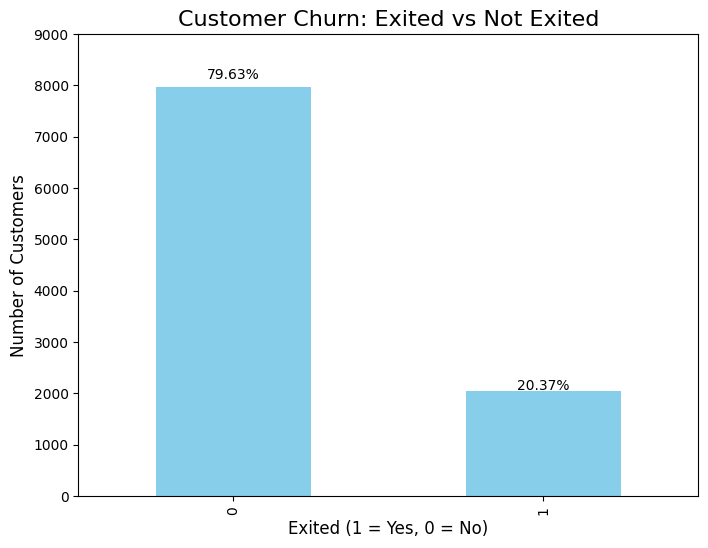

In [134]:
# Visualization: Bar plot showing the percentage of customers who exited and didn't exit

# Count the number of exited (1) and not exited (0) customers
exited_counts = df['Exited'].value_counts()

# Convert the counts to a dictionary for easier manipulation
exited_bar_data = {}
for index, item in exited_counts.iteritems():
    exited_bar_data[index] = item

# Print the dictionary to see the raw counts
print(exited_bar_data)

# Sort the data and unpack into x (Exited status) and y (Counts)
lists = sorted(exited_bar_data.items())  # Sort by exited status (0, 1)
x, y = zip(*lists)

# Create a DataFrame for the plot
tmp_df = pd.DataFrame(y, x)

# Plot a bar graph for exited vs. not exited customers
exited_not_exited_bar_ax = tmp_df.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.yticks([i for i in range(0, 10000, 1000)])
plt.title('Customer Churn: Exited vs Not Exited', fontsize=16)
plt.xlabel('Exited (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Remove the legend as we don't need it for a simple comparison
exited_not_exited_bar_ax.legend().remove()

# Annotate each bar with the percentage of customers
for p in exited_not_exited_bar_ax.patches:
    width = p.get_width()
    height = p.get_height()
    percent = '{:.2f}%'.format((height / len(df)) * 100)  # Calculate percentage
    x, y = p.get_xy()
    exited_not_exited_bar_ax.annotate(percent, (x + width / 2, y + height * 1.02), ha='center')

# Show the plot
plt.show()


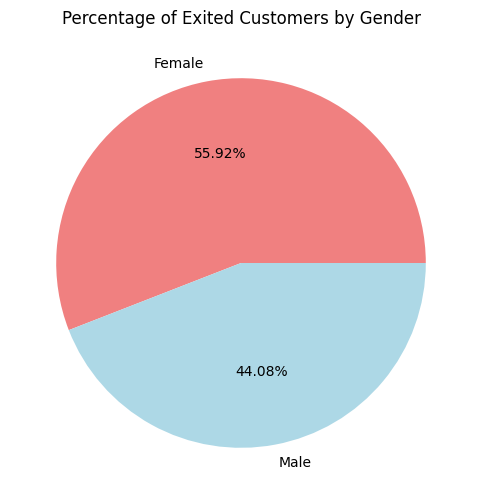

In [135]:
# Visualization: Pie chart showing the percentage of exited customers by gender

# Old code for counting men and women manually (not needed now with pandas functionality)
# men = 0
# women = 0
# for index, row in df.iterrows():
#     if row['Exited'] == 1:
#         if row['Gender'] == 'Male':
#             men += 1
#         else:
#             women += 1
# print(men, women, men / (men + women), women / (men + women))

# Group by gender and sum the 'Exited' column to get the total number of exited customers by gender
# Create a pie chart with percentage labels
plt.figure(figsize=(6, 6))
df.groupby("Gender")['Exited'].sum().plot.pie(
    autopct='%.2f%%',  # Display percentages with two decimal places
    colors=['lightcoral', 'lightblue'],  # Color scheme for male and female
    ylabel='',  # Remove default ylabel for a cleaner look
    title="Percentage of Exited Customers by Gender"
)


# Show the plot
plt.show()


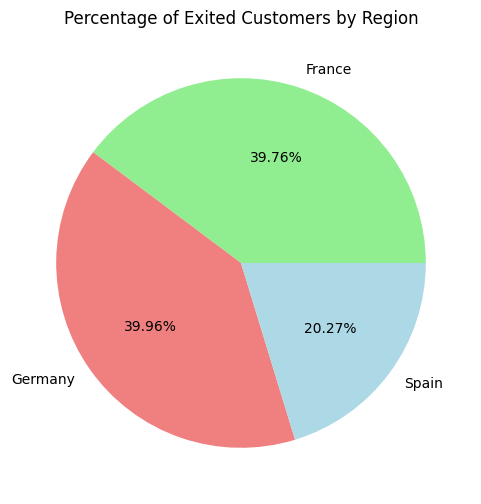

In [136]:
# Visualization: Pie chart showing the percentage of exited customers by region (Geography)

# Group by geography and sum the 'Exited' column to get the total number of exited customers by region
plt.figure(figsize=(6, 6))
df.groupby("Geography")['Exited'].sum().plot.pie(
    autopct='%.2f%%',  # Display percentages with two decimal places
    colors=['lightgreen', 'lightcoral', 'lightblue'],  # Color palette for regions
    ylabel='',  # Remove y-label for a cleaner chart
    title="Percentage of Exited Customers by Region"  # Add a title for the chart
)

plt.show()


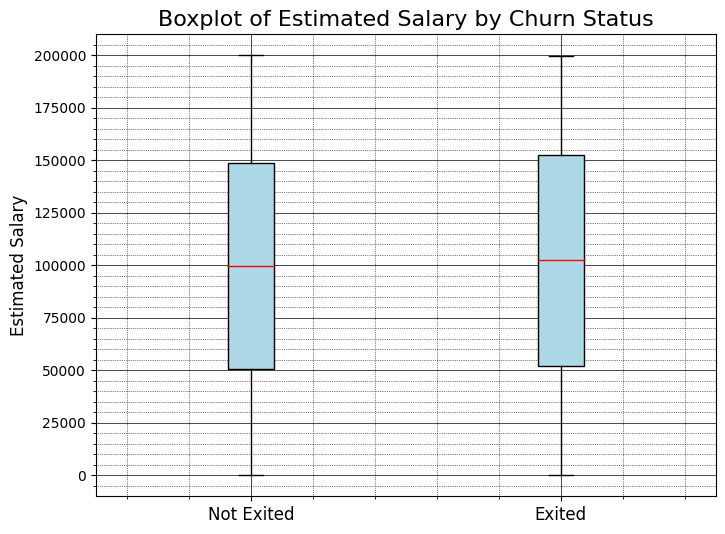

In [137]:
# Visualization: Boxplot of Estimated Salary by Churn (Exited vs Not Exited)

# Create a figure and axis for the boxplot
fig1, ax1 = plt.subplots(figsize=(8, 6))  # Set a proper figure size

# Create the boxplot for estimated salary: comparing churned (Exited == 1) vs non-churned (Exited == 0)
ax1.boxplot(
    [df[df['Exited'] == 0]['EstimatedSalary'], df[df['Exited'] == 1]['EstimatedSalary']],
    positions=[0, 1],
    patch_artist=True,  # Enables custom fill colors
    boxprops=dict(facecolor='lightblue', color='black'),  # Box color settings
    medianprops=dict(color='red')  # Median line in red for visibility
)

# Add x-axis labels
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Not Exited', 'Exited'], fontsize=12)

# Add y-axis label
ax1.set_ylabel('Estimated Salary', fontsize=12)

# Add title for the plot
ax1.set_title('Boxplot of Estimated Salary by Churn Status', fontsize=16)

# Enable minor ticks
ax1.minorticks_on()

# Customize grid lines: major and minor
ax1.grid(which='major', linestyle='-', linewidth=0.5, color='black')  # Major grid lines
ax1.grid(which='minor', linestyle=':', linewidth=0.5, color='black')  # Minor grid lines

plt.show()


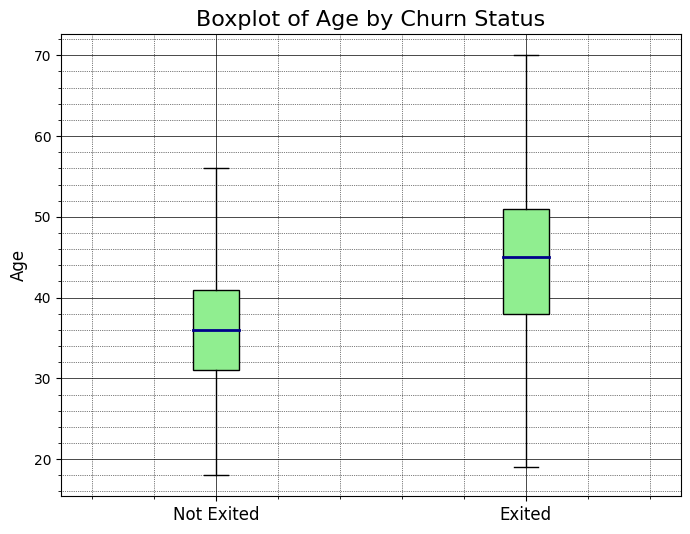

In [138]:
# Visualization: Boxplot of Age by Churn Status (Exited vs Not Exited)

# Create a figure and axis for the boxplot
fig2, ax2 = plt.subplots(figsize=(8, 6))  # Set figure size for better visibility

# Create the boxplot for age, excluding outliers (showfliers=False)
ax2.boxplot(
    [df[df['Exited'] == 0]['Age'], df[df['Exited'] == 1]['Age']],
    positions=[0, 1],
    showfliers=False,  # Exclude outliers for a cleaner plot
    patch_artist=True,  # Enable custom colors
    boxprops=dict(facecolor='lightgreen', color='black'),  # Custom box color
    medianprops=dict(color='darkblue', linewidth=2)  # Highlight the median
)

# Add x-axis labels for the two categories
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Not Exited', 'Exited'], fontsize=12)

# Add y-axis label
ax2.set_ylabel('Age', fontsize=12)

# Add a title for the plot
ax2.set_title('Boxplot of Age by Churn Status', fontsize=16)

# Enable minor ticks on the axes
ax2.minorticks_on()

# Customize the grid lines
ax2.grid(which='major', linestyle='-', linewidth=0.5, color='black')  # Major grid lines
ax2.grid(which='minor', linestyle=':', linewidth=0.5, color='black')  # Minor grid lines


plt.show()


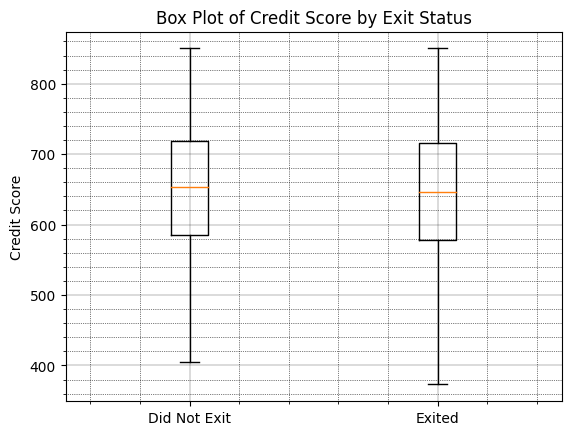

In [139]:
import matplotlib.pyplot as plt

# Create a box plot for Credit Score based on customer exit status
def plot_credit_score_boxplot(df):
    """Plot a box plot of Credit Scores grouped by exit status."""

    # Initialize the figure and axis
    fig, ax = plt.subplots()

    # Prepare data for box plot
    data = [df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 1]['CreditScore']]

    # Create the box plot without showing outliers
    ax.boxplot(data, positions=[0, 1], showfliers=False)

    # Enable minor ticks on the axis
    ax.minorticks_on()

    # Set gridlines for better readability
    ax.grid(which='major', linestyle='-', linewidth='0.2', color='black')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    # Set labels and title for clarity
    ax.set_xticklabels(['Did Not Exit', 'Exited'])
    ax.set_ylabel('Credit Score')
    ax.set_title('Box Plot of Credit Score by Exit Status')


# Call the function with your DataFrame
plot_credit_score_boxplot(df)


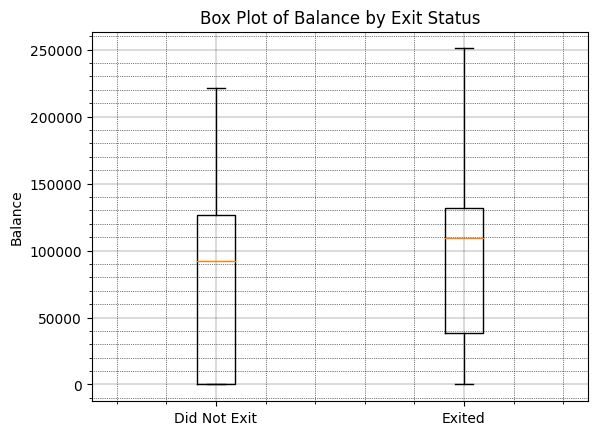

In [140]:
import matplotlib.pyplot as plt

# Create a box plot for Balance based on customer exit status
def plot_balance_boxplot(df):
    """Plot a box plot of Balances grouped by exit status."""

    # Initialize the figure and axis
    fig, ax = plt.subplots()

    # Prepare data for box plot
    data = [df[df['Exited'] == 0]['Balance'], df[df['Exited'] == 1]['Balance']]

    # Create the box plot without showing outliers
    ax.boxplot(data, positions=[0, 1], showfliers=False)

    # Enable minor ticks on the axis
    ax.minorticks_on()

    # Set gridlines for better readability
    ax.grid(which='major', linestyle='-', linewidth='0.2', color='black')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

    # Set labels and title for clarity
    ax.set_xticklabels(['Did Not Exit', 'Exited'])
    ax.set_ylabel('Balance')
    ax.set_title('Box Plot of Balance by Exit Status')


# Call the function with your DataFrame
plot_balance_boxplot(df)


In [141]:
# Define categorical and numeric feature keys for the dataset
CATEGORICAL_FEATURE_KEYS = [
    'Geography',  # Location of the customer
    'Gender'      # Gender of the customer
]

NUMERIC_FEATURE_KEYS = [
    'CreditScore',      # Customer's credit score
    'Age',              # Age of the customer
    'Tenure',           # Number of years as a customer
    'Balance',          # Account balance
    'NumOfProducts',    # Number of products held
    'HasCrCard',        # Whether the customer has a credit card
    'IsActiveMember',   # Whether the customer is an active member
    'EstimatedSalary'   # Estimated salary of the customer
]

# Define the complete list of columns in the dataset
COLUMNS = [
    'CreditScore',
    'Geography',
    'Gender',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'Exited'  # Target variable indicating if the customer exited
]


In [142]:
# Create mappings for unique values in Geography and Gender columns
def create_value_mappings(df, column_name):
    """Create a mapping of unique values in the specified column to integers."""
    unique_values = df[column_name].unique()
    return {value: index + 1 for index, value in enumerate(unique_values)}

# Create mappings for Geography and Gender
regions = create_value_mappings(df, 'Geography')
genders = create_value_mappings(df, 'Gender')

# Print the mappings
print("Regions Mapping:", regions)
print("Genders Mapping:", genders)


Regions Mapping: {'France': 1, 'Spain': 2, 'Germany': 3}
Genders Mapping: {'Female': 1, 'Male': 2}


In [143]:
# Drop unnecessary columns from the DataFrame
def drop_unnecessary_columns(df):
    """Remove columns that are not needed for analysis."""
    columns_to_drop = ['Surname', 'RowNumber', 'CustomerId']
    df.drop(columns=columns_to_drop, inplace=True)

# Call the function to drop the columns
drop_unnecessary_columns(df)


In [144]:
# Update Gender and Geography columns with mapped values
def map_values(df, column_name, mapping):
    """Map values in a specified column using a provided mapping."""
    df[column_name] = df[column_name].map(mapping)

# Apply the mapping functions to update Gender and Geography columns
map_values(df, 'Gender', genders)
map_values(df, 'Geography', regions)

In [145]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,2,39,5,0.00,2,1,0,96270.64,0
9996,516,1,2,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,772,3,2,42,3,75075.31,2,1,0,92888.52,1


## Data cleaning

In [146]:
print(len(df))
df = df.dropna()
print(len(df))

10000
10000


In [147]:
print(len(df))
df = df.drop_duplicates()
print(len(df))

10000
10000


In [148]:
# Data filtering: Apply various conditions to clean the DataFrame
def filter_data(df):
    """Filter the DataFrame based on specified conditions."""
    initial_length = len(df)

    # Apply multiple conditions for filtering
    df_filtered = df[
        (df['Balance'] >= 0) &
        (df['NumOfProducts'] >= 0) &
        (df['EstimatedSalary'] >= 0) &
        (df['Age'] > 15) &
        (df['Exited'].isin([0, 1])) &
        (df['IsActiveMember'].isin([0, 1])) &
        (df['HasCrCard'].isin([0, 1])) &
        (df['Gender'].isin([1, 2])) &
        (df['CreditScore'] >= 0)
    ]

    final_length = len(df_filtered)

    print(f'Initial number of rows: {initial_length}')
    print(f'Number of rows after filtering: {final_length}')

    return df_filtered

df = filter_data(df)


Initial number of rows: 10000
Number of rows after filtering: 10000


## Data Scaling

In [149]:
from sklearn import preprocessing

# Data scaling: Normalize specified columns using Min-Max scaling
def scale_data(df):
    """Apply Min-Max scaling to specified columns of the DataFrame."""

    # Scale selected features to the range [0, 1]
    min_max_scaler_0_1 = preprocessing.MinMaxScaler(feature_range=(0, 1))
    df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = min_max_scaler_0_1.fit_transform(
        df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
    )

    # Scale the 'Exited' column to the range [-1, 1]
    min_max_scaler_minus_1_1 = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    df[['Exited']] = min_max_scaler_minus_1_1.fit_transform(df[['Exited']])

# Call the function to scale the data
scale_data(df)

In [150]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,1,0.324324,2,0.000000,1,1,1,0.506735,1.0
1,0.516,2,1,0.310811,1,0.334031,1,0,1,0.562709,-1.0
2,0.304,1,1,0.324324,8,0.636357,3,1,0,0.569654,1.0
3,0.698,1,1,0.283784,1,0.000000,2,0,0,0.469120,-1.0
4,1.000,2,1,0.337838,2,0.500246,1,1,1,0.395400,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,2,0.283784,5,0.000000,2,1,0,0.481341,-1.0
9996,0.332,1,2,0.229730,10,0.228657,1,1,1,0.508490,-1.0
9997,0.718,1,1,0.243243,7,0.000000,1,0,1,0.210390,1.0
9998,0.844,3,2,0.324324,3,0.299226,2,1,0,0.464429,1.0


In [151]:
# Shuffle and split data into training and testing sets
def split_data(df, train_fraction=0.9):
    """Shuffle the DataFrame and split it into training and testing sets."""

    # Shuffle the DataFrame
    df_shuffled = df.sample(frac=1, random_state=42)  # Using random_state for reproducibility

    # Calculate the split index
    split_index = int(len(df_shuffled) * train_fraction)

    # Split into training and testing sets
    train_df = df_shuffled[:split_index]
    test_df = df_shuffled[split_index:]

    return train_df, test_df

# Call the function to shuffle and split the data
train_df, test_df = split_data(df)

In [152]:
# Prepare training data
def prepare_training_data(train_df):
    """Prepare features and target labels for training."""

    # Create a copy of the training DataFrame for features
    train_x = train_df.copy()

    # Remove the target column from features
    train_x.drop(columns=['Exited'], inplace=True)

    # Reshape features if necessary (uncomment if required)
    # train_x = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])  # Reshape for LSTM
    train_x = train_x.values  # Shape: (9000, 10)

    # Extract target labels
    train_y = train_df['Exited'].values

    return train_x, train_y

# Call the function to prepare the training data
train_x, train_y = prepare_training_data(train_df)

In [153]:
# Prepare testing data
def prepare_testing_data(test_df):
    """Prepare features and target labels for testing."""

    # Create a copy of the testing DataFrame for features
    test_x = test_df.copy()

    # Remove the target column from features
    test_x.drop(columns=['Exited'], inplace=True)

    # Reshape features if necessary (uncomment if required)
    # test_x = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])  # Reshape for LSTM
    test_x = test_x.values  # Shape: (num_samples, num_features)

    # Extract target labels
    test_y = test_df['Exited'].values

    return test_x, test_y

# Call the function to prepare the testing data
test_x, test_y = prepare_testing_data(test_df)


In [154]:
print(len(train_x))
print(len(train_y))
print(train_x)
print(train_y)

9000
9000
[[0.492      3.         2.         ... 0.         0.         0.2089039 ]
 [0.546      1.         2.         ... 1.         1.         0.7319085 ]
 [0.502      2.         1.         ... 1.         0.         0.29277661]
 ...
 [0.662      2.         2.         ... 1.         1.         0.90299559]
 [0.506      1.         2.         ... 0.         1.         0.04798218]
 [0.312      1.         1.         ... 0.         1.         0.97214054]]
[-1. -1. -1. ... -1. -1.  1.]


### Model 1

In [155]:
# Parameters
num_features = train_x.shape[1]  # Number of input features
learning_rate = 0.01
momentum = 0.0
training_epochs = 75

# Build the model
def create_model(input_shape):
    """Create and compile a Sequential model."""
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(1, activation='tanh'))

    # Compile the model
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse')

    return model

# Create and train the model
model1 = create_model((num_features,))
history1 = model1.fit(train_x, train_y, epochs=training_epochs, verbose=1)

Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6735
Epoch 2/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6209
Epoch 3/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6059
Epoch 4/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5916
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5851
Epoch 6/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5802
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5747
Epoch 8/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5732
Epoch 9/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5707
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5676
Epoch 11/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5666
Epoch 12/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5663
Epoch 13/75
282/282 [====

Weights for layer 0: (10, 1)
Weights for layer 1: (1,)


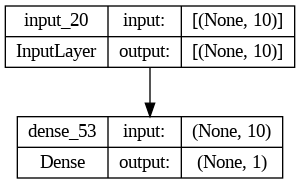

In [156]:
# Print model weights
def print_model_weights(model):
    """Print the weights of the model."""
    weights = model.get_weights()
    for i, weight in enumerate(weights):
        print(f"Weights for layer {i}: {weight.shape}")

# Call the function to print weights
print_model_weights(model1)

# Save a plot of the model architecture
tf.keras.utils.plot_model(model1, show_shapes=True, to_file='model1.png')

In [157]:
# Make predictions on the test set
def make_predictions(model, test_data):
    """Generate predictions for the given test data."""
    predictions = []

    for i in range(len(test_data)):
        input_p = test_data[i].reshape(1, num_features)  # Reshape input for model
        tmp_predict = model.predict(input_p, verbose=0)  # Predict without verbose output
        predictions.append(tmp_predict.flatten())  # Flatten to 1D if needed

    return predictions

# Call the function to make predictions
predictions = make_predictions(model1, test_x)

In [158]:
# Prepare a list to collect DataFrame rows
rows = []

# Populate the DataFrame with predictions
for i in range(len(predictions)):
    prediction = predictions[i][0]  # Adjust if needed based on the output shape
    predicted_value = -1 if prediction <= 0 else 1
    actual_value = test_y[i]

    # Append a new row to the list
    rows.append({
        'out': prediction,
        'predicted': predicted_value,
        'real': actual_value
    })

# Create the DataFrame using pd.DataFrame
out_df1 = pd.DataFrame(rows)

In [159]:
# Calculate accuracy
def calculate_accuracy(predictions_df):
    """Calculate the accuracy of predictions."""
    correct_predictions = (predictions_df['predicted'] == predictions_df['real']).sum()
    accuracy = (correct_predictions / predictions_df.shape[0]) * 100
    return accuracy

# Call the function and print the accuracy
accuracy1 = calculate_accuracy(out_df1)
print('Accuracy: {:.2f}%'.format(accuracy1))


Accuracy: 82.60%


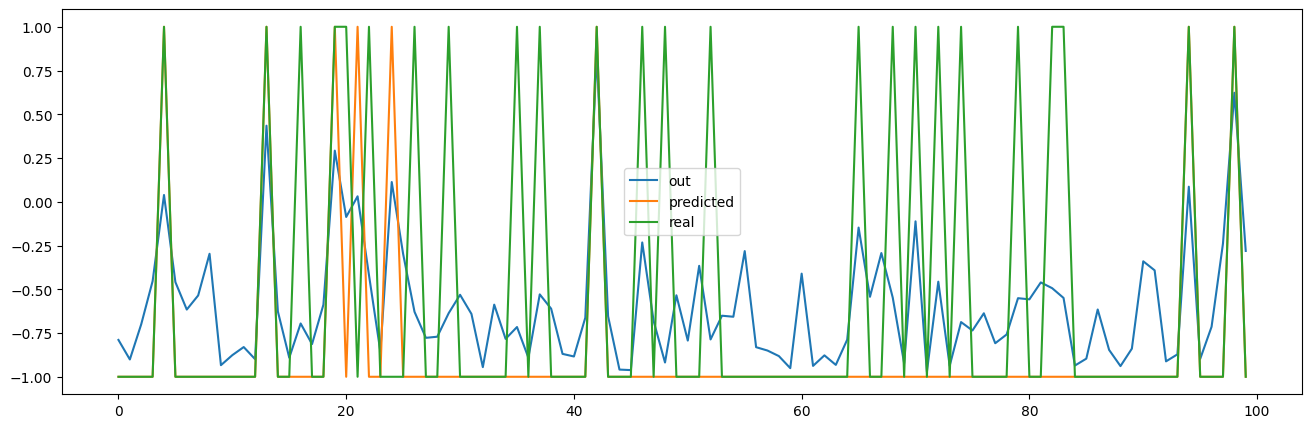

In [160]:
out_df1.head(100).plot(figsize=(16, 5))
plt.savefig('attach.png')

### Model 2

Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.7442
Epoch 2/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6377
Epoch 3/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6247
Epoch 4/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6354
Epoch 5/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6102
Epoch 6/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6136
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5992
Epoch 8/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6017
Epoch 9/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5944
Epoch 10/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5961
Epoch 11/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 12/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5942
Epoch 13/75
282/282 [====

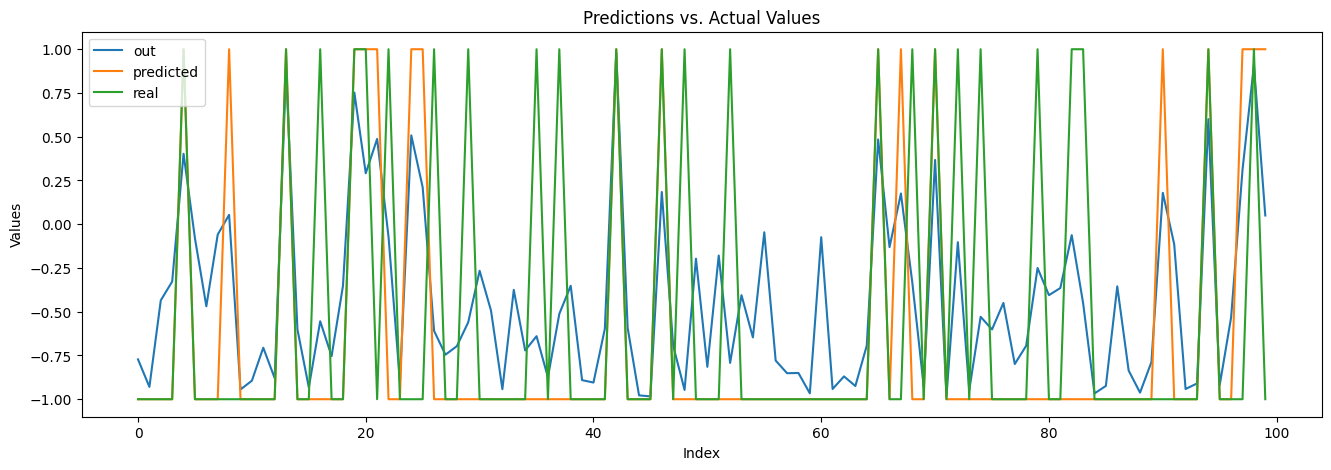

In [161]:
num_features = train_x.shape[1]  # 10
learning_rate = 0.05
momentum = 0
training_epochs = 75

# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model2.compile(optimizer=opt, loss='mse')

# Train the model
history2 = model2.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Make predictions
out = model2.predict(test_x)

# Create DataFrame for predictions
out_df2 = pd.DataFrame({
    'out': [pred[0] for pred in out],
    'predicted': [-1 if pred[0] <= 0 else 1 for pred in out],
    'real': test_y
})

# Calculate accuracy
accuracy2 = (out_df2['predicted'] == out_df2['real']).mean() * 100
print('Accuracy2: {:.2f}%'.format(accuracy2))

# Plot the first 100 predictions
out_df2.head(100).plot(figsize=(16, 5))
plt.title('Predictions vs. Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

Model 3

Epoch 1/75
282/282 [==============================] - 1s 1ms/step - loss: 0.7442
Epoch 2/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6217
Epoch 3/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6135
Epoch 4/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6066
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6001
Epoch 6/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5957
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5929
Epoch 8/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5882
Epoch 9/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5854
Epoch 10/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5826
Epoch 11/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5793
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5770
Epoch 13/75
282/282 [====

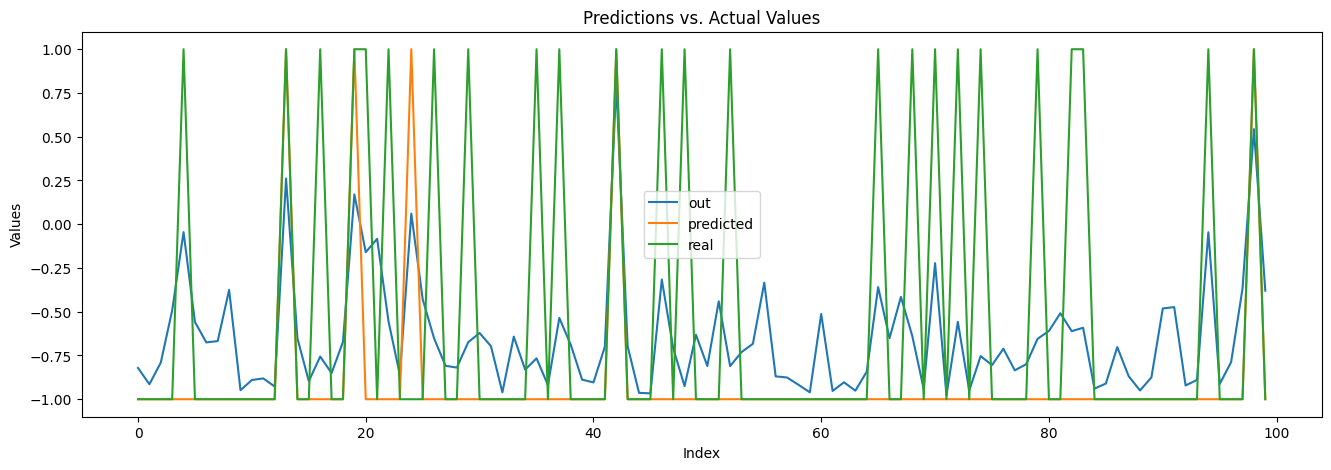

In [162]:
num_features = train_x.shape[1]  # 10
learning_rate = 0.01
momentum = 0.01
training_epochs = 75

# Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model3.compile(optimizer=opt, loss='mse')

# Train the model
history3 = model3.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Make predictions
out = model3.predict(test_x)

# Create DataFrame for predictions
out_df3 = pd.DataFrame({
    'out': [pred[0] for pred in out],
    'predicted': [-1 if pred[0] <= 0 else 1 for pred in out],
    'real': test_y
})

# Calculate accuracy
accuracy3 = (out_df3['predicted'] == out_df3['real']).mean() * 100
print('Accuracy3: {:.2f}%'.format(accuracy3))

# Plot the first 100 predictions
out_df3.head(100).plot(figsize=(16, 5))
plt.title('Predictions vs. Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


Model 4

Epoch 1/75
282/282 [==============================] - 1s 1ms/step - loss: 0.7240
Epoch 2/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6363
Epoch 3/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6171
Epoch 4/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6154
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6199
Epoch 6/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6058
Epoch 7/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5979
Epoch 8/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5986
Epoch 9/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5920
Epoch 10/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5890
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5978
Epoch 12/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5912
Epoch 13/75
282/282 [====

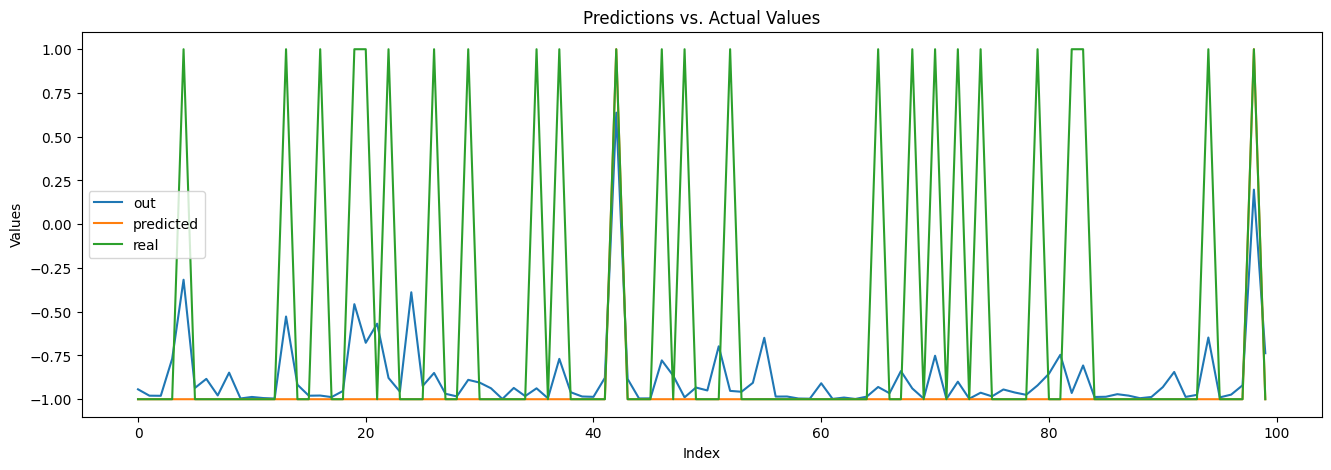

In [163]:
num_features = train_x.shape[1]  # 10
learning_rate = 0.05
momentum = 0.01
training_epochs = 75

# Create the model
model4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model4.compile(optimizer=opt, loss='mse')

# Train the model
history4 = model4.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Make predictions
out = model4.predict(test_x)

# Create DataFrame for predictions
out_df4 = pd.DataFrame({
    'out': [pred[0] for pred in out],
    'predicted': [-1 if pred[0] <= 0 else 1 for pred in out],
    'real': test_y
})

# Calculate accuracy
accuracy4 = (out_df4['predicted'] == out_df4['real']).mean() * 100
print('Accuracy4: {:.2f}%'.format(accuracy4))

# Plot the first 100 predictions
out_df4.head(100).plot(figsize=(16, 5))
plt.title('Predictions vs. Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


Model 5

Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.8996
Epoch 2/75
282/282 [==============================] - 0s 1ms/step - loss: 0.7659
Epoch 3/75
282/282 [==============================] - 0s 1ms/step - loss: 0.7595
Epoch 4/75
282/282 [==============================] - 0s 2ms/step - loss: 0.7499
Epoch 5/75
282/282 [==============================] - 0s 1ms/step - loss: 0.7335
Epoch 6/75
282/282 [==============================] - 0s 2ms/step - loss: 0.7029
Epoch 7/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6564
Epoch 8/75
282/282 [==============================] - 0s 1ms/step - loss: 0.6166
Epoch 9/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5929
Epoch 10/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5802
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5728
Epoch 12/75
282/282 [==============================] - 0s 1ms/step - loss: 0.5673
Epoch 13/75
282/282 [====

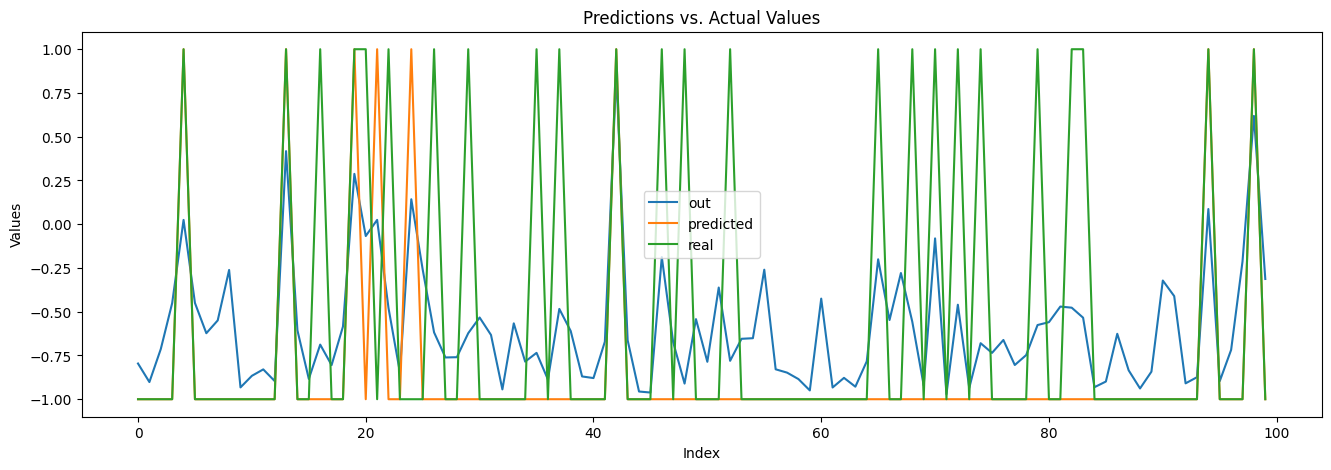

In [164]:
num_features = train_x.shape[1]  # 10
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Create the model
model5 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model using Adam optimizer
model5.compile(optimizer='adam', loss='mse')

# Train the model
history5 = model5.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Make predictions
out = model5.predict(test_x)

# Create DataFrame for predictions
out_df5 = pd.DataFrame({
    'out': [pred[0] for pred in out],
    'predicted': [-1 if pred[0] <= 0 else 1 for pred in out],
    'real': test_y
})

# Calculate accuracy
accuracy5 = (out_df5['predicted'] == out_df5['real']).mean() * 100
print('Accuracy5: {:.2f}%'.format(accuracy5))

# Plot the first 100 predictions
out_df5.head(100).plot(figsize=(16, 5))
plt.title('Predictions vs. Actual Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


In [165]:
history = {}
history['model(LR=0.01, opt=SGD, momentum=0, loss=mse)'] = history1.history['loss']
history['model(LR=0.05, opt=SGD, momentum=0, loss=mse)'] = history2.history['loss']
history['model(LR=0.01, opt=SGD, momentum=0.01, loss=mse)'] = history3.history['loss']
history['model(LR=0.05, opt=SGD, momentum=0.01, loss=mse)'] = history4.history['loss']
history['model(LR=0.01, opt=adam, momentum=0.00, loss=mse)'] = history5.history['loss']

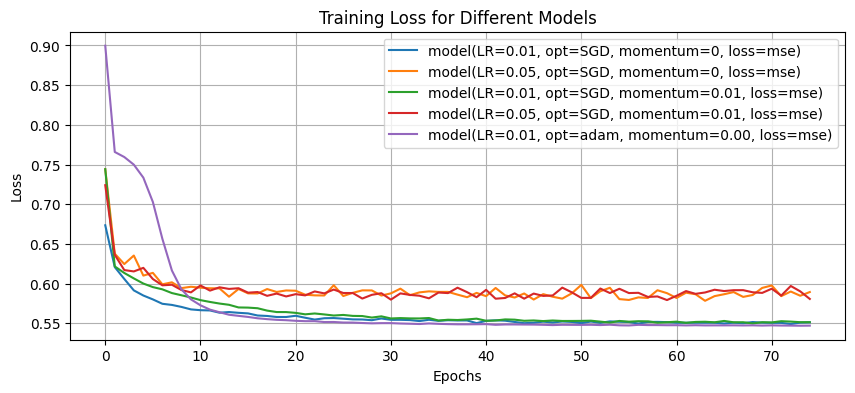

In [166]:
losses_df = pd.DataFrame(history)

# Plotting the losses
ax = losses_df.plot(figsize=(10, 4))
plt.title('Training Loss for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()


In [167]:
accurcy1 = (out_df1['predicted'] == out_df1['real']).sum() / out_df1.shape[0] * 100
accurcy2 = (out_df2['predicted'] == out_df2['real']).sum() / out_df2.shape[0] * 100
accurcy3 = (out_df3['predicted'] == out_df3['real']).sum() / out_df3.shape[0] * 100
accurcy4 = (out_df4['predicted'] == out_df4['real']).sum() / out_df4.shape[0] * 100
accurcy5 = (out_df5['predicted'] == out_df5['real']).sum() / out_df5.shape[0] * 100


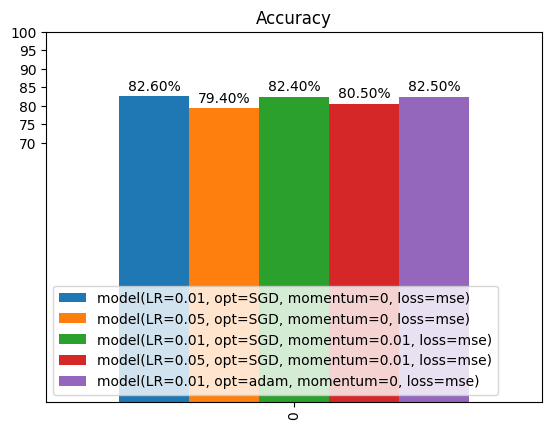

In [168]:
accurcies = {
    'model(LR=0.01, opt=SGD, momentum=0, loss=mse)': [accurcy1],
    'model(LR=0.05, opt=SGD, momentum=0, loss=mse)': [accurcy2],
    'model(LR=0.01, opt=SGD, momentum=0.01, loss=mse)': [accurcy3],
    'model(LR=0.05, opt=SGD, momentum=0.01, loss=mse)': [accurcy4],
    'model(LR=0.01, opt=adam, momentum=0, loss=mse)': [accurcy5]
}

acc_df = pd.DataFrame(accurcies)

# Plotting the accuracies
acc_ax = acc_df.plot(kind='bar', width=1.2)
plt.legend(loc='lower left')
plt.yticks([i for i in range(70, 101, 5)])  # Adjusting range to include 100
plt.title('Accuracy')

# Annotating each bar with its accuracy
for p in acc_ax.patches:
    width = p.get_width()
    height = p.get_height()
    percent = '{:.2f}%'.format(height)
    x, y = p.get_xy()
    acc_ax.annotate(percent, (x + width / 2, y + height * 1.02), ha='center')




Model 6

Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6321
Epoch 2/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6134
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5987
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5870
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5737
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5670
Epoch 7/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5621
Epoch 8/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5496
Epoch 9/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5345
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5220
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5140
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5038
Epoch 13/75
282/282 [====

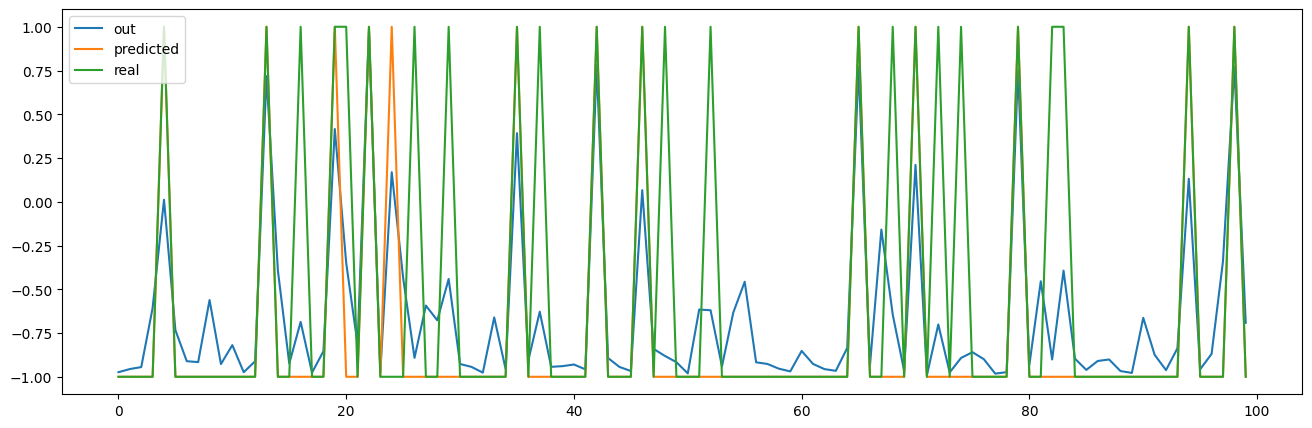

In [169]:
# Parameters
num_features = train_x.shape[1]    # 10
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Model definition
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model6.add(tf.keras.layers.Dense(32, activation='tanh'))
model6.add(tf.keras.layers.Dense(32, activation='tanh'))
model6.add(tf.keras.layers.Dense(16, activation='tanh'))
model6.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and compiling
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model6.compile(optimizer=opt, loss='mse')

# Training the model
history6 = model6.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Print model weights and plot model structure
print(model6.get_weights())
tf.keras.utils.plot_model(model6, show_shapes=True, to_file='model6.png')

# Predictions
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model6.predict(input_p, verbose=0)
    out.append(tmp_predict[0][0])  # Extract the prediction directly

# Create a DataFrame to store outputs, predictions, and real values
predictions = []
real_values = []
for i in range(len(out)):
    predicted = -1 if out[i] <= 0 else 1
    predictions.append(predicted)
    real_values.append(test_y[i])

out_df6 = pd.DataFrame({
    'out': out,
    'predicted': predictions,
    'real': real_values
})

# Calculate accuracy
accuracy6 = (out_df6['predicted'] == out_df6['real']).sum()
print('accuracy6: {:.2f}%'.format(accuracy6 / out_df6.shape[0] * 100))

# Plot the first 100 predictions
out_df6.head(100).plot(figsize=(16, 5))
plt.show()


Model 7

In [170]:
# Parameters
num_features = train_x.shape[1]    # 10
learning_rate = 0.05
momentum = 0.00
training_epochs = 75

# Model definition
model7 = tf.keras.Sequential()
model7.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model7.add(tf.keras.layers.Dense(32, activation='tanh'))
model7.add(tf.keras.layers.Dense(32, activation='tanh'))
model7.add(tf.keras.layers.Dense(16, activation='tanh'))
model7.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and compiling
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model7.compile(optimizer=opt, loss='mse')

# Training the model
history7 = model7.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Making predictions
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model7.predict(input_p, verbose=0)
    out.append(tmp_predict[0][0])  # Extract the prediction directly

# Create a DataFrame to store outputs, predictions, and real values
predictions = []
real_values = []
for i in range(len(out)):
    predicted = -1 if out[i] <= 0 else 1
    predictions.append(predicted)
    real_values.append(test_y[i])

out_df7 = pd.DataFrame({
    'out': out,
    'predicted': predictions,
    'real': real_values
})

# Calculate accuracy
accuracy7 = (out_df7['predicted'] == out_df7['real']).sum()
print('accuracy7: {:.2f}%'.format(accuracy7 / out_df7.shape[0] * 100))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6384
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6029
Epoch 3/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5734
Epoch 4/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5568
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5406
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5193
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5080
Epoch 8/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4977
Epoch 9/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4900
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4866
Epoch 11/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4851
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4861
Epoch 13/75
282/282 [====

Model 8

In [171]:
# Parameters
num_features = train_x.shape[1]    # 10
learning_rate = 0.05
momentum = 0.05
training_epochs = 75

# Model definition
model8 = tf.keras.Sequential()
model8.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model8.add(tf.keras.layers.Dense(32, activation='tanh'))
model8.add(tf.keras.layers.Dense(32, activation='tanh'))
model8.add(tf.keras.layers.Dense(16, activation='tanh'))
model8.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and compiling
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model8.compile(optimizer=opt, loss='mse')

# Training the model
history8 = model8.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Making predictions
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model8.predict(input_p, verbose=0)
    out.append(tmp_predict[0][0])  # Extract the prediction directly

# Create a DataFrame to store outputs, predictions, and real values
out_df8 = pd.DataFrame({
    'out': out,
    'predicted': [-1 if value <= 0 else 1 for value in out],
    'real': test_y
})

# Calculate accuracy
accuracy8 = (out_df8['predicted'] == out_df8['real']).sum()
print('accuracy8: {:.2f}%'.format(accuracy8 / out_df8.shape[0] * 100))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6328
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6047
Epoch 3/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5793
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5423
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5240
Epoch 6/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5052
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5051
Epoch 8/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4995
Epoch 9/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4911
Epoch 10/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4870
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4786
Epoch 12/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4817
Epoch 13/75
282/282 [====

Model 9

In [172]:
# Parameters
num_features = train_x.shape[1]    # 10
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Model definition
model9 = tf.keras.Sequential()
model9.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model9.add(tf.keras.layers.Dense(32, activation='tanh'))
model9.add(tf.keras.layers.Dense(32, activation='tanh'))
model9.add(tf.keras.layers.Dense(16, activation='tanh'))
model9.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and compiling
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Changed to Adam
model9.compile(optimizer=opt, loss='mse')

# Training the model
history9 = model9.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Making predictions
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model9.predict(input_p, verbose=0)
    out.append(tmp_predict[0][0])  # Extract the prediction directly

# Create a DataFrame to store outputs, predictions, and real values
out_df9 = pd.DataFrame({
    'out': out,
    'predicted': [-1 if value <= 0 else 1 for value in out],
    'real': test_y
})

# Calculate accuracy
accuracy9 = (out_df9['predicted'] == out_df9['real']).sum()
print('accuracy9: {:.2f}%'.format(accuracy9 / out_df9.shape[0] * 100))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6450
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5682
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5255
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5000
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4694
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4669
Epoch 7/75
282/282 [==============================] - 1s 3ms/step - loss: 0.4649
Epoch 8/75
282/282 [==============================] - 1s 3ms/step - loss: 0.4608
Epoch 9/75
282/282 [==============================] - 1s 3ms/step - loss: 0.4477
Epoch 10/75
282/282 [==============================] - 1s 3ms/step - loss: 0.4739
Epoch 11/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4580
Epoch 12/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4422
Epoch 13/75
282/282 [====

Model 10

In [173]:
# Parameters
num_features = train_x.shape[1]    # 10
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Model definition
model10 = tf.keras.Sequential()
model10.add(tf.keras.layers.InputLayer(input_shape=(num_features,)))
model10.add(tf.keras.layers.Dense(32, activation='relu'))
model10.add(tf.keras.layers.Dense(32, activation='relu'))
model10.add(tf.keras.layers.Dense(16, activation='relu'))
model10.add(tf.keras.layers.Dense(1, activation='relu'))

# Optimizer and compiling
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
model10.compile(optimizer=opt, loss='mse')

# Training the model
history10 = model10.fit(train_x, train_y, epochs=training_epochs, verbose=1)

# Making predictions
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model10.predict(input_p, verbose=0)
    out.append(tmp_predict[0][0])  # Extract the prediction directly

# Create a DataFrame to store outputs, predictions, and real values
out_df10 = pd.DataFrame({
    'out': out,
    'predicted': [-1 if value <= 0 else 1 for value in out],
    'real': test_y
})

# Calculate accuracy
accuracy10 = (out_df10['predicted'] == out_df10['real']).sum()
print('accuracy10: {:.2f}%'.format(accuracy10 / out_df10.shape[0] * 100))


Epoch 1/75
282/282 [==============================] - 1s 3ms/step - loss: 1.0011
Epoch 2/75
282/282 [==============================] - 1s 3ms/step - loss: 1.0001
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 1.0000
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 1.0000
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 1.0000
Epoch 6/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 8/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 9/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 1.0000
Epoch 12/75
282/282 [==============================] - 1s 2ms/step - loss: 1.0000
Epoch 13/75
282/282 [====

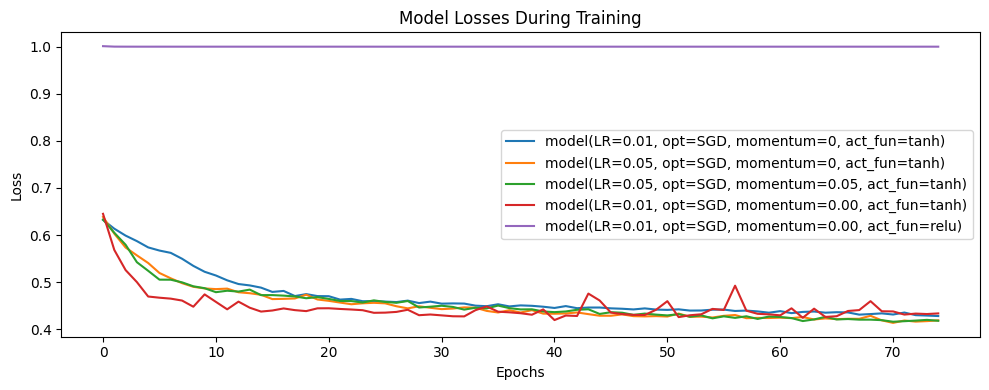

In [174]:
# Collecting loss history
history_2 = {}
history_2['model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh)'] = history6.history['loss']
history_2['model(LR=0.05, opt=SGD, momentum=0, act_fun=tanh)'] = history7.history['loss']
history_2['model(LR=0.05, opt=SGD, momentum=0.05, act_fun=tanh)'] = history8.history['loss']
history_2['model(LR=0.01, opt=SGD, momentum=0.00, act_fun=tanh)'] = history9.history['loss']
history_2['model(LR=0.01, opt=SGD, momentum=0.00, act_fun=relu)'] = history10.history['loss']

# Create DataFrame for losses
losses_df = pd.DataFrame(history_2)

# Plotting Losses
plt.figure(figsize=(10, 4))
for column in losses_df.columns:
    plt.plot(losses_df[column], label=column)

plt.title('Model Losses During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

# Save plot
plt.savefig('model_losses.png')
plt.show()

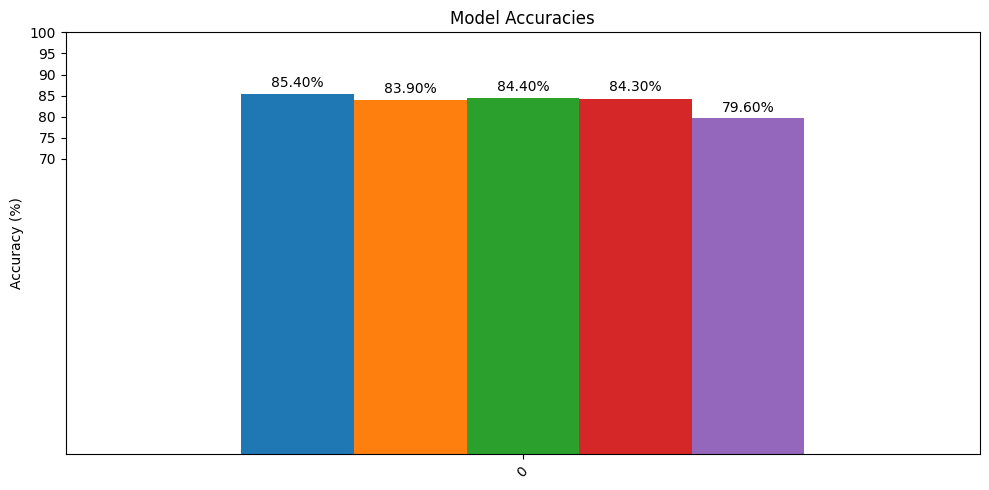

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Define accuracy data
accuracies = {
    'model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh)': [accuracy6 / 10],
    'model(LR=0.05, opt=SGD, momentum=0, act_fun=tanh)': [accuracy7 / 10],
    'model(LR=0.05, opt=SGD, momentum=0.05, act_fun=tanh)': [accuracy8 / 10],
    'model(LR=0.01, opt=SGD, momentum=0.00, act_fun=tanh)': [accuracy9 / 10],
    'model(LR=0.01, opt=SGD, momentum=0.00, act_fun=relu)': [accuracy10 / 10]
}

# Create DataFrame
acc_df = pd.DataFrame(accuracies)

# Plotting
plt.figure(figsize=(10, 5))
acc_ax = acc_df.plot(kind='bar', width=0.8, legend=False, ax=plt.gca())
plt.title('Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)

# Customize y-ticks
plt.yticks([i for i in range(70, 101, 5)])

# Annotate bars with accuracy values
for p in acc_ax.patches:
    width = p.get_width()
    height = p.get_height()
    percent = '{:.2f}%'.format(height)
    x, y = p.get_xy()
    acc_ax.annotate(percent, (x + width / 2, y + height * 1.02), ha='center')

# Save plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('accmodel6210.png')
plt.show()


## Third network

Model 11


In [176]:
# Parameters
num_features = train_x.shape[1]
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Model Definition
model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.InputLayer(input_shape=(num_features)))
model11.add(tf.keras.layers.Dense(32, activation='tanh'))
model11.add(tf.keras.layers.Dropout(rate=0.1, seed=1))
model11.add(tf.keras.layers.Dense(32, activation='tanh'))
model11.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

# Compile the model
model11.compile(optimizer=opt, loss='mse')

# Train the model
history11 = model11.fit(train_x.tolist(), train_y.tolist(), epochs=training_epochs, verbose=1)

# Save model weights and plot the model
print(model11.get_weights())
tf.keras.utils.plot_model(model11, show_shapes=True, to_file='model11.png')

# Prediction
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model11.predict(input_p.tolist(), verbose=0)
    out.append(tmp_predict)

# Prepare output DataFrame
out_df11 = pd.DataFrame({
    'out': [],
    'predicted': [],
    'real': []
})

# Populate DataFrame with predictions
for i in range(len(out)):
    tmp_df = pd.DataFrame({
        'out': [out[i][0][0]],
        'predicted': [-1 if out[i][0][0] <= 0 else 1],
        'real': [test_y[i]]
    })
    out_df11 = pd.concat([out_df11, tmp_df], ignore_index=True)

# Calculate accuracy
accuracy11 = (out_df11['predicted'] == out_df11['real']).sum()
accuracy_percentage = (accuracy11 / out_df11.shape[0]) * 100

# Print accuracy
print('Accuracy11: {:.2f}%'.format(accuracy_percentage))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6456
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6121
Epoch 3/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6044
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5956
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5918
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5843
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5810
Epoch 8/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5762
Epoch 9/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5704
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5613
Epoch 11/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5629
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5592
Epoch 13/75
282/282 [====

Model 12

In [177]:
# Parameters
num_features = train_x.shape[1]  # Number of features (e.g., 10)
learning_rate = 0.01
momentum = 0.00
training_epochs = 75

# Model Definition
model12 = tf.keras.Sequential()
model12.add(tf.keras.layers.InputLayer(input_shape=(num_features)))
model12.add(tf.keras.layers.Dense(32, activation='tanh'))
model12.add(tf.keras.layers.Dropout(rate=0.1, seed=1))
model12.add(tf.keras.layers.Dense(32, activation='tanh'))
model12.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and EarlyStopping Callback
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1)

# Compile the model
model12.compile(optimizer=opt, loss='mse')

# Train the model
history12 = model12.fit(train_x.tolist(), train_y.tolist(), epochs=training_epochs, verbose=1, callbacks=[es])

# Prediction
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model12.predict(input_p.tolist(), verbose=0)
    out.append(tmp_predict)

# Prepare output DataFrame
out_df12 = pd.DataFrame({
    'out': [],
    'predicted': [],
    'real': []
})

# Populate DataFrame with predictions
for i in range(len(out)):
    tmp_df = pd.DataFrame({
        'out': [out[i][0][0]],
        'predicted': [-1 if out[i][0][0] <= 0 else 1],
        'real': [test_y[i]]
    })
    out_df12 = pd.concat([out_df12, tmp_df], ignore_index=True)

# Calculate accuracy
accuracy12 = (out_df12['predicted'] == out_df12['real']).sum()
accuracy_percentage = (accuracy12 / out_df12.shape[0]) * 100

# Print accuracy
print('Accuracy12: {:.2f}%'.format(accuracy_percentage))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6735
Epoch 2/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6232
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6137
Epoch 4/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6075
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6007
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5945
Epoch 7/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5902
Epoch 8/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5816
Epoch 9/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5820
Epoch 9: early stopping
Accuracy12: 80.50%


Model 13

In [178]:
# Parameters
num_features = train_x.shape[1]
learning_rate = 0.05
momentum = 0.00
training_epochs = 75

# Model Definition
model13 = tf.keras.Sequential()
model13.add(tf.keras.layers.InputLayer(input_shape=(num_features)))
model13.add(tf.keras.layers.Dense(32, activation='tanh'))
model13.add(tf.keras.layers.Dropout(rate=0.1, seed=1))
model13.add(tf.keras.layers.Dense(32, activation='tanh'))
model13.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and EarlyStopping Callback
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1)

# Compile the model
model13.compile(optimizer=opt, loss='mse')

# Train the model
history13 = model13.fit(train_x.tolist(), train_y.tolist(), epochs=training_epochs, verbose=1, callbacks=[es])

# Prediction
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model13.predict(input_p.tolist(), verbose=0)
    out.append(tmp_predict)

# Prepare output DataFrame
out_df13 = pd.DataFrame({
    'out': [],
    'predicted': [],
    'real': []
})

# Populate DataFrame with predictions
for i in range(len(out)):
    tmp_df = pd.DataFrame({
        'out': [out[i][0][0]],
        'predicted': [-1 if out[i][0][0] <= 0 else 1],
        'real': [test_y[i]]
    })
    out_df13 = pd.concat([out_df13, tmp_df], ignore_index=True)

# Calculate accuracy
accuracy13 = (out_df13['predicted'] == out_df13['real']).sum()
accuracy_percentage = (accuracy13 / out_df13.shape[0]) * 100

# Print accuracy
print('Accuracy13: {:.2f}%'.format(accuracy_percentage))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6409
Epoch 2/75
282/282 [==============================] - 0s 2ms/step - loss: 0.6120
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5962
Epoch 4/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5735
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5646
Epoch 6/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5437
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5371
Epoch 8/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5168
Epoch 9/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5156
Epoch 10/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5098
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5015
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.4977
Epoch 13/75
282/282 [====

Model 14

In [179]:
# Parameters
num_features = train_x.shape[1]  # Number of features (e.g., 10)
learning_rate = 0.05
momentum = 0.02
training_epochs = 75

# Model Definition
model14 = tf.keras.Sequential()
model14.add(tf.keras.layers.InputLayer(input_shape=(num_features)))
model14.add(tf.keras.layers.Dense(32, activation='tanh'))
model14.add(tf.keras.layers.Dropout(rate=0.1, seed=1))
model14.add(tf.keras.layers.Dense(32, activation='tanh'))
model14.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and EarlyStopping Callback
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1)

# Compile the model
model14.compile(optimizer=opt, loss='mse')

# Train the model
history14 = model14.fit(train_x.tolist(), train_y.tolist(), epochs=training_epochs, verbose=1, callbacks=[es])

# Prediction
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model14.predict(input_p.tolist(), verbose=0)
    out.append(tmp_predict)

# Prepare output DataFrame
out_df14 = pd.DataFrame({
    'out': [],
    'predicted': [],
    'real': []
})

# Populate DataFrame with predictions
for i in range(len(out)):
    tmp_df = pd.DataFrame({
        'out': [out[i][0][0]],
        'predicted': [-1 if out[i][0][0] <= 0 else 1],
        'real': [test_y[i]]
    })
    out_df14 = pd.concat([out_df14, tmp_df], ignore_index=True)

# Calculate accuracy
accuracy14 = (out_df14['predicted'] == out_df14['real']).sum()
accuracy_percentage = (accuracy14 / out_df14.shape[0]) * 100

# Print accuracy
print('Accuracy14: {:.2f}%'.format(accuracy_percentage))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6536
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6223
Epoch 3/75
282/282 [==============================] - 1s 3ms/step - loss: 0.5984
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5925
Epoch 5/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5778
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5752
Epoch 7/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5672
Epoch 8/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5496
Epoch 9/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5384
Epoch 10/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5326
Epoch 11/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5275
Epoch 12/75
282/282 [==============================] - 0s 2ms/step - loss: 0.5095
Epoch 13/75
282/282 [====

Model 15

In [180]:
# Parameters
num_features = train_x.shape[1]  # Number of features (e.g., 10)
learning_rate = 0.001
momentum = 0.0
training_epochs = 75

# Model Definition
model15 = tf.keras.Sequential()
model15.add(tf.keras.layers.InputLayer(input_shape=(num_features)))
model15.add(tf.keras.layers.Dense(32, activation='tanh'))
model15.add(tf.keras.layers.Dropout(rate=0.1, seed=1))
model15.add(tf.keras.layers.Dense(32, activation='tanh'))
model15.add(tf.keras.layers.Dense(1, activation='tanh'))

# Optimizer and EarlyStopping Callback
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
es = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1)

# Compile the model
model15.compile(optimizer=opt, loss='mse')

# Train the model
history15 = model15.fit(train_x.tolist(), train_y.tolist(), epochs=training_epochs, verbose=1, callbacks=[es])

# Prediction
out = []
for i in range(len(test_x)):
    input_p = test_x[i].reshape(1, num_features)
    tmp_predict = model15.predict(input_p.tolist(), verbose=0)
    out.append(tmp_predict)

# Prepare output DataFrame
out_df15 = pd.DataFrame(columns=['out', 'predicted', 'real'])

# Populate DataFrame with predictions
for i in range(len(out)):
    tmp_df = pd.DataFrame({
        'out': [out[i][0][0]],
        'predicted': [-1 if out[i][0][0] <= 0 else 1],
        'real': [test_y[i]]
    })
    out_df15 = pd.concat([out_df15, tmp_df], ignore_index=True)

# Calculate accuracy
accuracy15 = (out_df15['predicted'] == out_df15['real']).sum()
accuracy_percentage = (accuracy15 / out_df15.shape[0]) * 100

# Print accuracy
print('Accuracy15: {:.2f}%'.format(accuracy_percentage))


Epoch 1/75
282/282 [==============================] - 1s 2ms/step - loss: 0.6422
Epoch 2/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5856
Epoch 3/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5607
Epoch 4/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5469
Epoch 5/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5303
Epoch 6/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5166
Epoch 7/75
282/282 [==============================] - 1s 2ms/step - loss: 0.5024
Epoch 8/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4949
Epoch 9/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4915
Epoch 10/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4839
Epoch 11/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4781
Epoch 12/75
282/282 [==============================] - 1s 2ms/step - loss: 0.4741
Epoch 13/75
282/282 [====

<Figure size 1000x400 with 0 Axes>

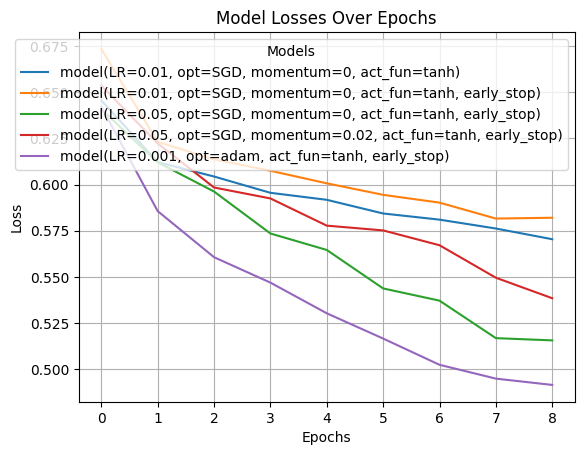

9


In [181]:
# Collect loss history for each model
history_3 = {
    'model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh)': history11.history['loss'],
    'model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh, early_stop)': history12.history['loss'],
    'model(LR=0.05, opt=SGD, momentum=0, act_fun=tanh, early_stop)': history13.history['loss'],
    'model(LR=0.05, opt=SGD, momentum=0.02, act_fun=tanh, early_stop)': history14.history['loss'],
    'model(LR=0.001, opt=adam, act_fun=tanh, early_stop)': history15.history['loss']
}

# Determine the minimum length of loss arrays
min_length = min(len(loss) for loss in history_3.values())

# Create a DataFrame for the losses, trimming to the shortest length
losses_df = pd.DataFrame({model_name: loss[:min_length] for model_name, loss in history_3.items()})

# Plotting the loss history
plt.figure(figsize=(10, 4))
losses_df.plot()
plt.title('Model Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Models')
plt.grid(True)

# Save the plot
plt.savefig('model_losses.png')
plt.show()

print(losses_df.shape[0])

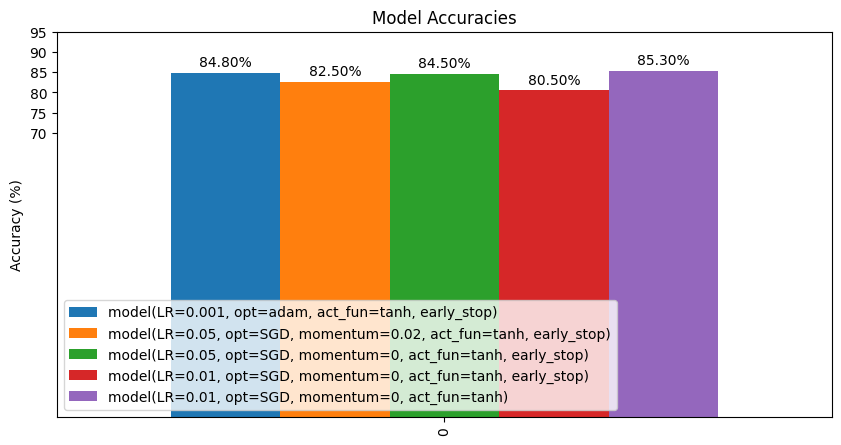

In [182]:
# Collect accuracy data for each model
accuracies = {
    'model(LR=0.001, opt=adam, act_fun=tanh, early_stop)': [accuracy15 / 10],
    'model(LR=0.05, opt=SGD, momentum=0.02, act_fun=tanh, early_stop)': [accuracy14 / 10],
    'model(LR=0.05, opt=SGD, momentum=0, act_fun=tanh, early_stop)': [accuracy13 / 10],
    'model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh, early_stop)': [accuracy12 / 10],
    'model(LR=0.01, opt=SGD, momentum=0, act_fun=tanh)': [accuracy11 / 10]
}

# Create a DataFrame for accuracies
acc_df = pd.DataFrame(accuracies)

# Plotting the accuracies
plt.figure(figsize=(10, 5))
acc_ax = acc_df.plot(kind='bar', width=1.2, ax=plt.gca())
plt.legend(loc='lower left')
plt.yticks([i for i in range(70, 100, 5)])
plt.title('Model Accuracies')
plt.ylabel('Accuracy (%)')

# Annotate bars with accuracy percentages
for p in acc_ax.patches:
    width = p.get_width()
    height = p.get_height()
    percent = '{:.2f}%'.format(height)
    x, y = p.get_xy()
    acc_ax.annotate(percent, (x + width / 2, y + height * 1.02), ha='center')

# Save the plot
plt.savefig('model_accuracies.png')
plt.show()
